In [1]:
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Import and analyse datasets

In [2]:
dataset_tool_sofist_comma = pd.read_csv("../data/model/dataset_tool_sofist_comma.csv")
dataset_cogroo_sofist_comma = pd.read_csv("../data/model/dataset_cogroo_sofist_comma.csv")

In [3]:
dataset_tool_sofist_comma.columns

Index(['essay', 'comp1', 'CASING', 'CLICHES', 'COMPOUNDING', 'CONFUSED_WORDS',
       'CONTRACTIONS', 'FORMAL_SPEECH', 'GRAMMAR', 'MISC', 'MISSPELLING',
       'PUNCTUATION', 'REDACTION_TIPS', 'REDUNDANCY', 'REPETITIONS', 'STYLE',
       'SYNTAX', 'TYPOS', '#correções tool_language', 'palavras_por_texto',
       'paragrafos_por_texto', 'palavras_no_paragrafo_1',
       'palavras_no_ultimo_paragrafo', 'palavras_nos_intermediarios',
       'palavras_unicas', 'quantidade_de_sentencas_longas',
       'quantidade_de_paragrafos_com_sentenca_unica', 'comma_mistakes'],
      dtype='object')

In [4]:
dataset_cogroo_sofist_comma.columns

Index(['essay', 'comp1', 'government:GOVERNMENT', 'probs:paronyms',
       'punctuation:BEFORE_SENTENCES', 'repetition:DUPLICATED_TOKEN', 'xml:1',
       'xml:10', 'xml:103', 'xml:104', 'xml:105', 'xml:107', 'xml:11',
       'xml:111', 'xml:113', 'xml:114', 'xml:115', 'xml:117', 'xml:118',
       'xml:121', 'xml:122', 'xml:124', 'xml:127', 'xml:128', 'xml:129',
       'xml:13', 'xml:14', 'xml:17', 'xml:2', 'xml:21', 'xml:3', 'xml:39',
       'xml:4', 'xml:40', 'xml:46', 'xml:47', 'xml:5', 'xml:50', 'xml:51',
       'xml:52', 'xml:57', 'xml:58', 'xml:6', 'xml:61', 'xml:65', 'xml:67',
       'xml:71', 'xml:73', 'xml:78', 'xml:79', 'xml:82', 'xml:84', 'xml:86',
       'xml:87', 'xml:88', 'xml:9', 'xml:91', 'xml:95', 'xml:96', 'xml:97',
       '#correções cogroo', 'palavras_por_texto', 'paragrafos_por_texto',
       'palavras_no_paragrafo_1', 'palavras_no_ultimo_paragrafo',
       'palavras_nos_intermediarios', 'palavras_unicas',
       'quantidade_de_sentencas_longas',
       'quantidade_

### Pre-processing

In [5]:
X1 = dataset_tool_sofist_comma.drop(columns=['comp1', 'essay'])
y1 = dataset_tool_sofist_comma['comp1'].astype(str)
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [6]:
y1.value_counts()

comp1
1.0    887
1.5    567
0.5    428
2.0    189
0.0     93
Name: count, dtype: int64

In [7]:
X2 = dataset_cogroo_sofist_comma.drop(columns=['comp1', 'essay'])
y2 = dataset_cogroo_sofist_comma['comp1'].astype(str)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2,y2, test_size=0.2, random_state=42)

In [8]:
y2.value_counts()

comp1
1.0    887
1.5    567
0.5    428
2.0    189
0.0     93
Name: count, dtype: int64

In [9]:
undersample = RandomUnderSampler(sampling_strategy='not minority')
train_X1_under, train_y1_under = undersample.fit_resample(train_X1, train_y1)
train_X2_under, train_y2_under = undersample.fit_resample(train_X2, train_y2)

In [10]:
train_y1_under.value_counts()

comp1
0.0    73
0.5    73
1.0    73
1.5    73
2.0    73
Name: count, dtype: int64

In [11]:
train_y2_under.value_counts()

comp1
0.0    73
0.5    73
1.0    73
1.5    73
2.0    73
Name: count, dtype: int64

### Generating Models

In [30]:
def calculate_metrics(model, _x_train, _y_train, _x_test, _y_test):
    train_metric = model.score(_x_train, _y_train)
    test_metric = model.score(_x_test, _y_test) 
    _y_pred = model.predict(_x_test)
    classes = model.classes_
    metrics = [
        ["train", train_metric],
        ["test", test_metric],
        ["accuracy", accuracy_score(_y_test, _y_pred)],
        ["f1-weighted", f1_score(_y_test, _y_pred, average='weighted')],
        ["mean-squared-error", mean_squared_error(_y_test, _y_pred)]
    ]
    return metrics

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    pipelines = []
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' ,KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  ,GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' ,SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  ,AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' ,GradientBoostingClassifier())])))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  ,RandomForestClassifier())])))

    return pipelines

In [62]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'f1_weighted'

    results = {}
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        # print(model)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[f'{name}'] = cv_results
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  
    return results

- Testing for language tool

In [63]:
models = GetScaledModel('minmax')
results = BasedLine2(train_X1, train_y1,models)

In [64]:
tool_results = pd.DataFrame(results)
tool_results.head()

,minmaxKNN,minmaxNB,minmaxSVM,minmaxAB,minmaxGBM,minmaxRF
0,0.358919,0.325002,0.401563,0.394841,0.388595,0.405643
1,0.329917,0.326328,0.361958,0.352449,0.344584,0.371423
2,0.314453,0.283995,0.325766,0.391231,0.408941,0.417810
3,0.371026,0.313682,0.322678,0.425857,0.381083,0.415463
4,0.307810,0.045312,0.347744,0.391391,0.411106,0.374132


In [65]:
models = GetScaledModel('minmax')
results = BasedLine2(train_X1_under, train_y1_under,models)

In [66]:
tool_results_under = pd.DataFrame(results)
tool_results_under.head()

,minmaxKNN,minmaxNB,minmaxSVM,minmaxAB,minmaxGBM,minmaxRF
0,0.180816,0.220105,0.297297,0.215056,0.303502,0.355201
1,0.281004,0.151014,0.356724,0.235175,0.201262,0.306521
2,0.315989,0.175313,0.450887,0.282883,0.315741,0.373691
3,0.205631,0.179923,0.350397,0.276299,0.389792,0.395207
4,0.254796,0.176904,0.341600,0.320734,0.301351,0.341144


- Testing for Cogroo

In [67]:
models = GetScaledModel('minmax')
results = BasedLine2(train_X2, train_y2,models)

In [68]:
cogroo_results = pd.DataFrame(results)
cogroo_results.head()

,minmaxKNN,minmaxNB,minmaxSVM,minmaxAB,minmaxGBM,minmaxRF
0,0.322077,0.028851,0.298791,0.420564,0.379155,0.362507
1,0.332731,0.070882,0.291780,0.368266,0.393925,0.399972
2,0.305286,0.061721,0.283119,0.395723,0.428609,0.398880
3,0.326433,0.044588,0.302809,0.359314,0.391848,0.342626
4,0.306806,0.070327,0.298064,0.337224,0.338131,0.349224


In [69]:
models = GetScaledModel('minmax')
results = BasedLine2(train_X2_under, train_y2_under,models)

In [70]:
cogroo_results_under = pd.DataFrame(results)
cogroo_results.head()

,minmaxKNN,minmaxNB,minmaxSVM,minmaxAB,minmaxGBM,minmaxRF
0,0.322077,0.028851,0.298791,0.420564,0.379155,0.362507
1,0.332731,0.070882,0.291780,0.368266,0.393925,0.399972
2,0.305286,0.061721,0.283119,0.395723,0.428609,0.398880
3,0.326433,0.044588,0.302809,0.359314,0.391848,0.342626
4,0.306806,0.070327,0.298064,0.337224,0.338131,0.349224


- Generate Comparative Graph

In [71]:
comp_df_tool = pd.melt(tool_results)
comp_df_tool['fonte'] = 'language tool (sem undersampling)'
comp_df_cogroo = pd.melt(cogroo_results)
comp_df_cogroo['fonte'] = 'cogroo + hunspell (sem undersampling)'

comp_df_tool_under = pd.melt(tool_results_under)
comp_df_tool_under['fonte'] = 'language tool (com undersampling)'
comp_df_cogroo_under = pd.melt(cogroo_results_under)
comp_df_cogroo_under['fonte'] = 'cogroo + hunspell (com undersampling)'

comp_df = pd.concat([comp_df_tool, comp_df_tool_under, comp_df_cogroo, comp_df_cogroo_under], axis=0)

Text(0.5, 0, 'Modelos')

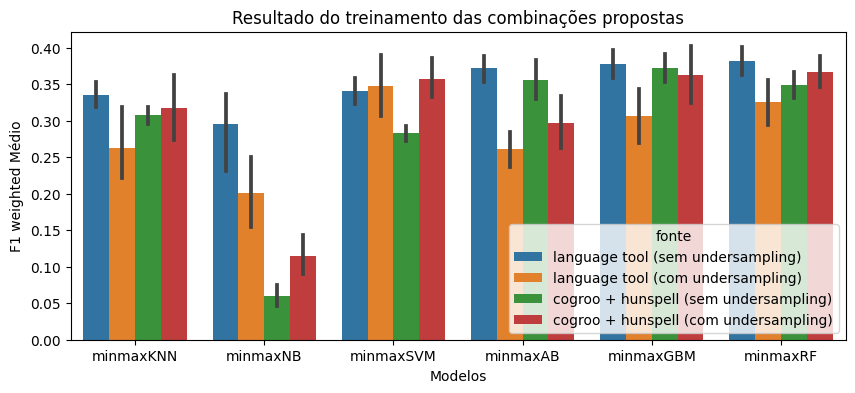

In [72]:
plt.figure(figsize = (10, 4))
sns.barplot(comp_df, hue='fonte', x='variable', y='value')
plt.title("Resultado do treinamento das combinações propostas")
plt.ylabel("F1 weighted Médio")
plt.xlabel("Modelos")


### Optimazing GradientBoostingClassifier

In [12]:
scaler = MinMaxScaler()
scale = scaler.fit(train_X1)
train_X1_scaled = scale.fit_transform(train_X1)
test_X1_scaled = scale.fit_transform(test_X1)

In [36]:
scaler = MinMaxScaler()
scale = scaler.fit(train_X1)
train_X2_scaled = scale.fit_transform(train_X2)
test_X2_scaled = scale.fit_transform(test_X2)

In [21]:
param_grid = {
    'learning_rate': [0.01,0.05,0.1, 0.5, 1],
    'min_samples_leaf': [4,5,6],
    "max_depth":[3,5,8],
    'subsample': [0.6,0.7,0.8],
    "criterion": ["friedman_mse",  "squared_error"],
    "max_features":["log2","sqrt"],
}
clf = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring="f1_weighted", n_jobs = -1)

In [ ]:
gradient_boost_model_1 = clf.fit(train_X1_scaled, train_y1)
gradient_boost_model_2 = clf.fit(train_X2_scaled, train_y2)

In [46]:
gradient_boost_model_2.score(test_X2_scaled, test_y2), gradient_boost_model_2.score(test_X1_scaled, test_y1)

0.31720601056743736

In [55]:
pred_y1 = gradient_boost_model_1.predict(test_X1_scaled)
pred_y2 = gradient_boost_model_2.predict(test_X2_scaled)

In [52]:
print(classification_report(test_y1, pred_y1))

              precision    recall  f1-score   support

         0.0       0.20      0.35      0.25        20
         0.5       0.31      0.40      0.35        77
         1.0       0.47      0.55      0.50       181
         1.5       0.38      0.30      0.33       108
         2.0       0.00      0.00      0.00        47

    accuracy                           0.39       433
   macro avg       0.27      0.32      0.29       433
weighted avg       0.35      0.39      0.37       433



In [56]:
print(classification_report(test_y2, pred_y2))

              precision    recall  f1-score   support

         0.0       0.15      0.10      0.12        20
         0.5       0.26      0.44      0.33        77
         1.0       0.41      0.50      0.45       181
         1.5       0.35      0.18      0.23       108
         2.0       0.22      0.04      0.07        47

    accuracy                           0.34       433
   macro avg       0.28      0.25      0.24       433
weighted avg       0.33      0.34      0.32       433



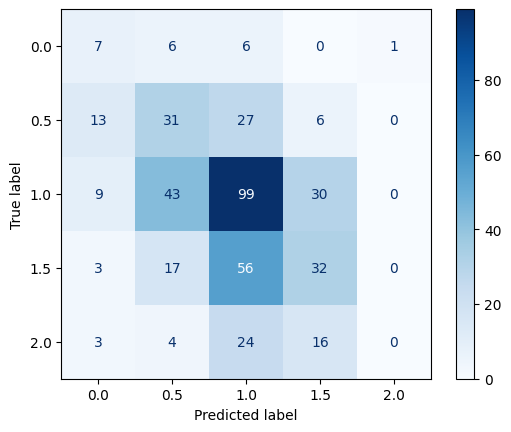

In [29]:
cm = confusion_matrix(test_y1, pred_y1, labels=gradient_boost_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gradient_boost_model.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

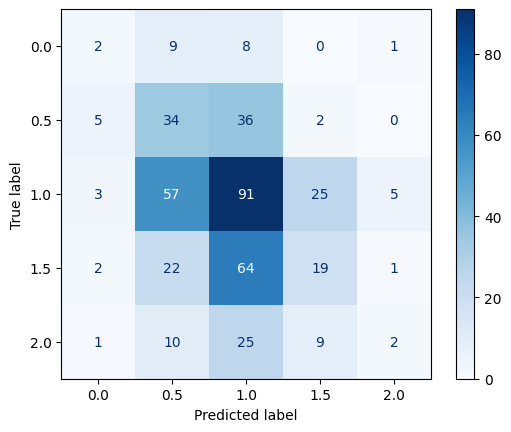

In [57]:
cm = confusion_matrix(test_y2, pred_y2, labels=gradient_boost_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gradient_boost_model.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [ ]:
print(classification_report(test_y1, pred_y1))

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12        16
         0.5       0.52      0.13      0.21       100
         1.0       0.41      0.89      0.56       157
         1.5       0.47      0.23      0.31       121
         2.0       0.00      0.00      0.00        35

    accuracy                           0.42       429
   macro avg       0.48      0.26      0.24       429
weighted avg       0.44      0.42      0.35       429



c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa